In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Dataset is from Kaggle
# https://www.kaggle.com/c/titanic/overview

titanic_data = pd.read_csv('Titanic.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Exploratory analysis
# Evaluate target variable distribution

titanic_data.Survived.mean()

0.3838383838383838

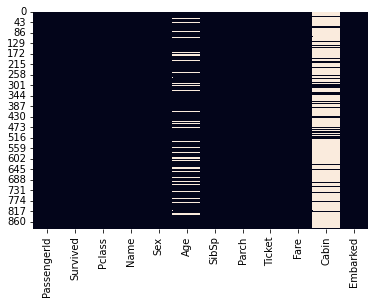

In [5]:
# Explore missing values

sns.heatmap(titanic_data.isnull(), cbar=False)

In [6]:
titanic_data_clean = titanic_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

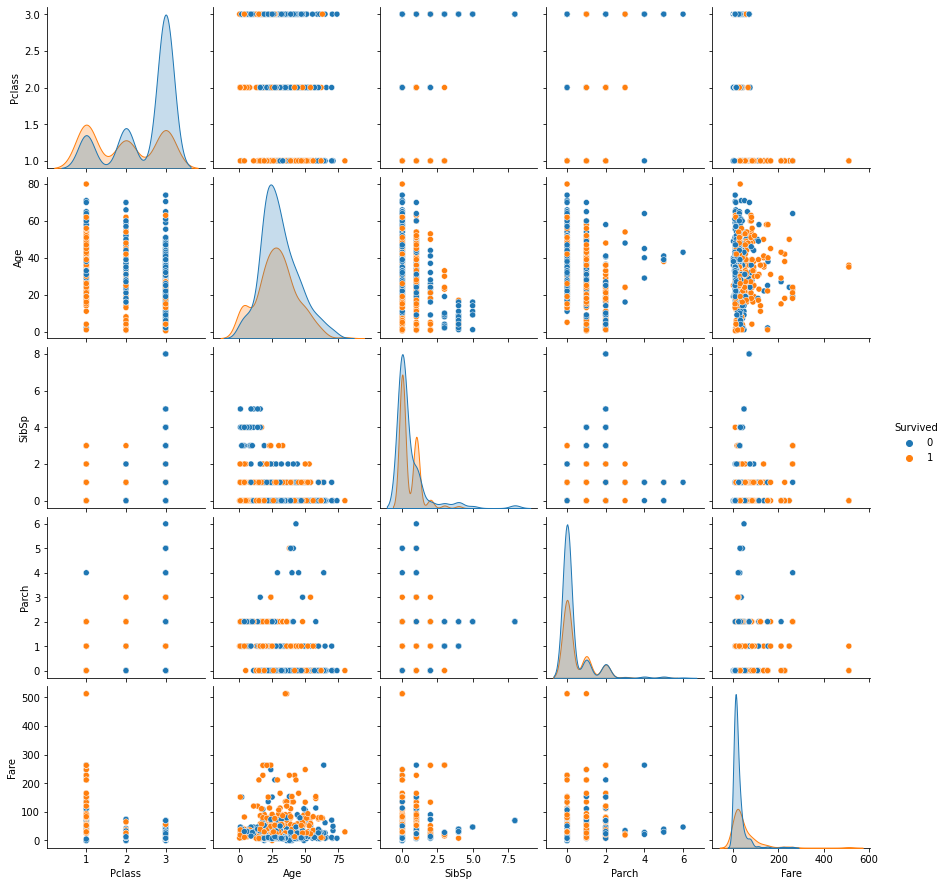

In [7]:
sns.pairplot(titanic_data_clean, hue = 'Survived')

In [8]:
titanic_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
titanic_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
 titanic_data_clean['Pclass'] =  titanic_data_clean['Pclass'].astype('category',copy=False)

In [11]:
# tree.DecisionTreeClassifier() does not support missing values
# Mean imputation would bias the model
# I will replace missing values with 999 to distinguish records with missing values

titanic_data_clean['Age'].fillna(999, inplace=True)



In [12]:
# Decision trees are not affected by multicollinearity
# Need to keep all dummy variables

titanic_data_clean = pd.get_dummies(titanic_data_clean)

In [ ]:
titanic_data_clean.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.486592,14.526497,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X = titanic_data_clean.drop('Survived', axis=1)
y = titanic_data_clean['Survived']

In [14]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [17]:
y_pred = dt_model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[141,  12],
       [ 49,  66]])

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       153
           1       0.85      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268



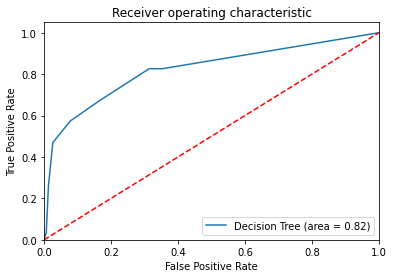

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[141,  12],
       [ 48,  67]])

In [22]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       153
           1       0.85      0.58      0.69       115

    accuracy                           0.78       268
   macro avg       0.80      0.75      0.76       268
weighted avg       0.79      0.78      0.77       268



In [23]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [127]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

print(classification_report(y_test, rf_random.predict(X_test)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       153
           1       0.85      0.61      0.71       115

    accuracy                           0.79       268
   macro avg       0.81      0.77      0.77       268
weighted avg       0.80      0.79      0.78       268



In [25]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[131,  22],
       [ 42,  73]])

In [26]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       153
           1       0.77      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



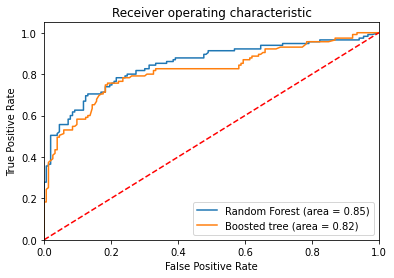

In [102]:
# Random Forest 
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Feature importance evaluation

##Install eli5 package that implements permutation based feature importance

In [35]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [36]:
import eli5
from eli5.sklearn import PermutationImportance

In [41]:
# Note that you can specify the metric that you would like to use to evaluate
# feature importance
# scoring=''
# list of metrics is available here
# https://scikit-learn.org/stable/modules/model_evaluation.html

perm = PermutationImportance(dt_model, random_state=1, scoring='roc_auc').fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2405 ± 0.0345,Sex_female
0.0508 ± 0.0298,Age
0.0408 ± 0.0162,Pclass_1
0.0279 ± 0.0146,Pclass_3
0.0264 ± 0.0067,SibSp
0.0016 ± 0.0028,Embarked_S
0.0003 ± 0.0018,Fare
0 ± 0.0000,Embarked_Q
0 ± 0.0000,Embarked_C
0 ± 0.0000,Sex_male


In [42]:
perm = PermutationImportance(rf_model, random_state=1, scoring='roc_auc').fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0872 ± 0.0192,Sex_female
0.0310 ± 0.0300,Sex_male
0.0285 ± 0.0065,Fare
0.0239 ± 0.0171,Pclass_3
0.0124 ± 0.0046,SibSp
0.0102 ± 0.0096,Pclass_1
0.0081 ± 0.0153,Age
0.0053 ± 0.0057,Pclass_2
0.0043 ± 0.0073,Parch
0.0006 ± 0.0030,Embarked_S


In [43]:
perm = PermutationImportance(bt_model, random_state=1, scoring='roc_auc').fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1912 ± 0.0565,Sex_male
0.0401 ± 0.0128,Pclass_3
0.0300 ± 0.0170,SibSp
0.0267 ± 0.0203,Age
0.0083 ± 0.0083,Fare
0.0042 ± 0.0054,Pclass_2
0.0038 ± 0.0050,Parch
0.0009 ± 0.0042,Embarked_S
0.0003 ± 0.0018,Sex_female
0 ± 0.0000,Embarked_Q


#Plotting feature effects

#Categorical feature effect

In [104]:
gender_summary = titanic_data.groupby('Sex', as_index=False)['Survived'].mean()

In [105]:
gender_summary = gender_summary.merge(titanic_data.groupby('Sex', as_index=False)['Survived'].count(), left_on='Sex', right_on='Sex', suffixes=("_rate","_count"))


In [69]:
gender_summary

,Sex,Survived_rate,Survived_count
0,female,0.742038,314
1,male,0.188908,577


<BarContainer object of 2 artists>

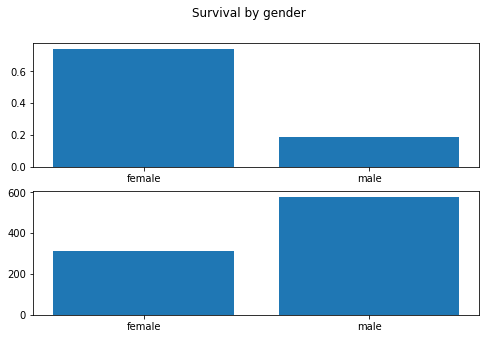

In [95]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(8,5))

fig.suptitle('Survival by gender')
axs[0].bar(gender_summary.Sex, gender_summary.Survived_rate )
axs[1].bar(gender_summary.Sex, gender_summary.Survived_count)

Observed effect: women were much more likely to survive than men (74% vs. 18.9%). Men outnumbered women on the Titanic by a margin of nearly 2:1 (577 vs 314).

##Continuous feature effects (need to bin)

In [115]:
# Setup bin ranges, could be equally spaced or not

age_bins = [0, 12, 20, 50, 100]

age_summary = titanic_data.groupby(pd.cut(titanic_data['Age'], bins=age_bins))['Survived'].agg(['mean', 'size'])

In [116]:
age_summary

,mean,size
Age,,
"(0, 12]",0.579710,69
"(12, 20]",0.381818,110
"(20, 50]",0.394904,471
"(50, 100]",0.343750,64


In [117]:
# Need to reset index to convert Age to a column

age_summary.reset_index(inplace=True)

In [118]:
age_summary

,Age,mean,size
0,"(0, 12]",0.579710,69
1,"(12, 20]",0.381818,110
2,"(20, 50]",0.394904,471
3,"(50, 100]",0.343750,64


<BarContainer object of 4 artists>

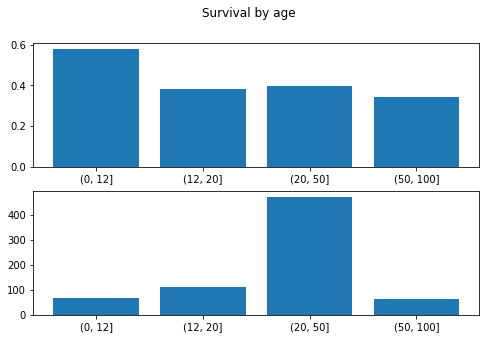

In [126]:
fig2, axs2 = plt.subplots(2, figsize=(8,5))

fig2.suptitle('Survival by age')
axs2[0].bar(age_summary.Age.astype('str'), age_summary['mean'])
axs2[1].bar(age_summary.Age.astype('str'), age_summary['size'])

Observed effect: Children (under the age of 12) were much more likely to survive (57.9% vs 38% average).  There were only 69 children on the Titanic.